In [1]:
# conda install -c anaconda gensim

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gensim import corpora
from gensim.models import LsiModel
from gensim.parsing.preprocessing import preprocess_string

/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
import re
HANDLE = '@\w+'
LINK = 'https?://t\.co/\w+'
SPECIAL_CHARS = '&lt;|&lt;|&amp;|#'
PARA = '\n+'
def clean(text):
    text = re.sub(LINK, ' ', text)
    text = re.sub(SPECIAL_CHARS, ' ', text)
    text = re.sub(PARA, '\n', text)
    return text

In [4]:
# conda install -c conda-forge wikipedia

In [5]:
import wikipedia
wikipedia.search('Cricket World Cup'), wikipedia.search('FIF A World Cup')

(['Cricket World Cup',
  '1983 Cricket World Cup',
  '2023 Cricket World Cup',
  '2011 Cricket World Cup',
  "Women's Cricket World Cup",
  '2007 Cricket World Cup',
  '1992 Cricket World Cup',
  "2022 Women's Cricket World Cup",
  '2003 Cricket World Cup',
  '1987 Cricket World Cup'],
 ['Seven-a-side football',
  'Ivory Coast national football team',
  "2017 AMF Futsal Women's World Cup",
  'Federazione Italiana Football Sala',
  "7's Football League",
  'Anne-Marie Nielsen',
  'List of Italian football champions',
  'Nadège Cissé',
  'Football in Italy',
  'Nina Kpaho'])

In [6]:
latest_soccer_cricket = ['2018 FIFA World Cup', '2019 Cricket World Cup']
corpus = ''
for cup in latest_soccer_cricket:
    corpus = corpus + wikipedia.page(cup).content
corpus

'The 2018 FIFA World Cup was an international football tournament contested by men\'s national teams that took place between 14 June and 15 July 2018 in Russia. It was the 21st FIFA World Cup, a worldwide football tournament held once every four years. It was the eleventh time the championships had been held in Europe, and the first time they were held in Eastern Europe. At an estimated cost of over $14.2 billion, it was the most expensive World Cup to date.The tournament phase involved 32 teams, of which 31 came through qualifying competitions, while as the host nation Russia qualified automatically. Of the 32, 20 had also appeared in the 2014 event, while Iceland and Panama each made their first appearance at the World Cup. 64 matches were played in 12 venues across 11 cities. Germany, the defending champions, were eliminated in the group stage. Host nation Russia was eliminated in the quarter-finals. In the final, France played Croatia on 15 July at the Luzhniki Stadium in Moscow. F

In [7]:
text = clean(corpus)
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
pos_list = ['NOUN']
preproc_text = []
preproc_sent = []
for token in doc:
    if token.text != '\n':
        if not(token.is_stop) and not(token.is_punct) and token.pos_ in pos_list:
            preproc_sent.append(token.lemma_)
    else:
        preproc_text.append(preproc_sent)
        preproc_sent = []
#last sentence 
preproc_text.append(preproc_sent)
print(preproc_text)

[['football', 'tournament', 'man', 'team', 'place', 'football', 'tournament', 'year', 'time', 'championship', 'time', 'cost', 'date', 'tournament', 'phase', 'team', 'qualifying', 'competition', 'host', 'nation', 'event', 'appearance', 'match', 'venue', 'city', 'champion', 'group', 'stage', 'host', 'nation', 'quarter', 'final', 'match'], ['player', 'tournament', 'player', 'goal', 'tournament', 'goalkeeper', 'sheet', 'people', 'game', 'tournament'], ['host', 'selection'], ['bidding', 'procedure', 'tournament', 'association', 'interest', 'country', 'bid', 'proceeding', 'bid', 'government', 'letter', 'bid', 'bidding', 'process', 'nation', 'bid', 'bid', 'bid', 'bid', 'host', 'tournament', 'right', 'host', 'round', 'voting', 'bid', 'tournament', 'round', 'voting', 'result'], ['host', 'selection', 'criticism'], ['choice', 'host', 'issue', 'level', 'racism', 'football', 'right', 'abuse', 'government', 'discrimination', 'people', 'society', 'involvement', 'conflict', 'call', 'tournament', 'anne

In [8]:
dictionary = corpora.Dictionary(preproc_text)
corpus = [dictionary.doc2bow(text) for text in preproc_text]
NUM_TOPICS = 3
lsamodel = LsiModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary)
lsamodel.print_topics()

[(0,
  '-0.535*"run" + -0.524*"wicket" + -0.316*"match" + -0.256*"tournament" + -0.168*"victory" + -0.160*"over" + -0.158*"century" + -0.131*"score" + -0.129*"ball" + -0.122*"game"'),
 (1,
  '0.429*"team" + 0.376*"match" + 0.363*"tournament" + -0.290*"wicket" + 0.259*"time" + -0.253*"run" + 0.155*"right" + 0.151*"stadium" + 0.133*"stage" + 0.123*"host"'),
 (2,
  '0.463*"team" + -0.396*"match" + -0.312*"right" + 0.298*"time" + -0.230*"broadcast" + -0.179*"stadium" + 0.148*"nation" + -0.120*"viewer" + -0.119*"city" + 0.113*"final"')]

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (4).

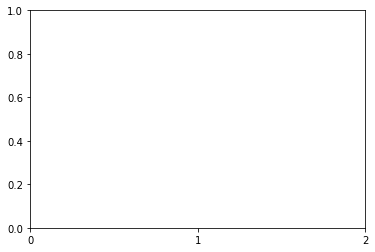

In [9]:
#to determine which topics have the highest weight for a document
model_arr = np.argmax(lsamodel.get_topics(), axis=0)
y, x = np.histogram(model_arr, bins=np.arange(NUM_TOPICS+1))
fig, ax = plt.subplots()
plt.xticks(ticks=np.arange(NUM_TOPICS), labels=np.arange(NUM_TOPICS+1))
ax.plot(x[:-1], y)
fig.show()